# Credit Card Default Prediction

In this analysis we will use the Credit card default data from the famous UCI machine learning repository. Most of us credit cards in our daily lives. For credit card companies it is important to know who will be able to pay their bills and who will defualt. Not only this is important while issuing the card, this is also important while the customer is using the card. This helps in identifying potential default cases and probably flag them. 

Let's first of all load all the required libraries for this analysis. We will use different machine learnign algorithms to predict the default cases in this dataset. So, this essentially becomes a supervised binary classification problem.

In [15]:
############ Loading Libraries ################
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

With all the libraries loaded, next we need to read in our dataset and do some quick checks.

In [16]:
############ Loading data ################

seed=12
np.random.seed(seed)

data=pd.read_csv('UCI_Credit_Card.csv',index_col=0)
print(data.shape)
display(data.head(5))

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


We also set random seed to a certain value for reproducibility of our results. As most of the machine learning algorithms involve some kind of randomization, this helps in prodcuing the same results later. While reading in the data we mention the 1st column to be considered as Index for our dataframe. This column consists of unique customer id.

A quick check of our dataset suggests, it has 30,000 cases and 24 variables. So, we have data for 30,000 customers and 24 features for each of them. Also, last column of our dataset is the variable indicating default and no-default cases. Here 0 means no default and 1 means the customer defaulted. 

Next, we just rename the last column to something more handy. Also, the categorical variables such as Sex, Education and Marriage and converted to Categorial type instead of integer.

In [17]:
############ Data processing ################

data=data.rename(columns={"default.payment.next.month": "Default"})

for col in ['SEX', 'EDUCATION', 'MARRIAGE','Default']:
    data[col] = data[col].astype('category')

Next, we need to divide our dataset in training and test set. So, we build our model on the training data and check the performance of our model on the test data. In this case, we use 80% of the data for training the model and rest as test set. As, the dataset consists 30,000 instances 6,000 instances in the test set should be good enough.

In [19]:
############ Train-test split ################

X=data.drop('Default', axis=1)
y=data.iloc[:,-1]
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Next, we would be trying out 3 different models and checking their performance on the test dataset. First we will try the most simple algorithm for binary classification case, *i.e.* Logistic regression. We build our model based on the training data and then check the performance using different metrics on the test data set.

Here we change the maximum number of iterations to 500 as the solution didn't converge when we tried with the default value of 100.

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4648
           1       0.00      0.00      0.00      1352

    accuracy                           0.77      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.77      0.68      6000



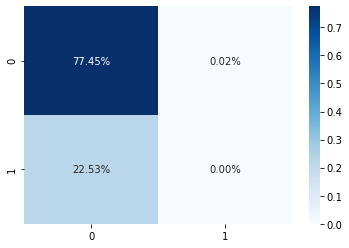

In [21]:
############ Logistic Regression ################

log_reg = LogisticRegression(max_iter=500,random_state=seed)
log_reg_results=log_reg.fit(data_train, label_train)

y_pred_lr = log_reg.predict(data_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(data_test, label_test)))
print(classification_report(label_test, y_pred_lr))
cf_matrix_lr = confusion_matrix(label_test, y_pred_lr)
sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='Blues')

Results show that accuracy of the logistic regression model is about 77% accurate. This suggest out of 100 cases on an average 77 times our model is correct in terms of predicting the correct label (default or no default). Not bad, right for good old Logistic regression. Next, we deep dive into these results with classification report and confusion matrix.

Results from the classification report and confusion matrix suggest our model predicts no default in all the cases. And their are about 77% no default cases in the test data, so the accuracy is 77%. Disappointing result from our old friend Logistic regression. 

Classification report shows some metrics and break them across the label classes to adjudge our model performance for all the classes. Expectedly for default cases all the metric are about zero. To get more in depth understanding of this metric, visit this link below:

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

In the confusion matrix, on the vertical axis we have the actual cases and in the horizontal axis we have the predictions. So the diagonal elements of our matrix denotes where our model gets the prediction right and off-diagoanls where it predicts wrong class. 

Important point to remember, for this analysis and across all the three models we use a threshold of 0.5 to predict default cases. This means if only the probability of default is above 0.5 then only we classify it as default case. In real life this is not the case. In most binary classificaton this threshold is decided based the cross-validation set. Particularly for credit card cases default is much lower in practial applications. Thus, in this case also, lowering this threshold would result in some default cases being predicted rather than almost 0 cases now. For simplicity we leave this untinkered for our analysis.

Next, we try the famous Random Famous classifier. Here we use 500 trees and minimum sample split 0f 240. This means there should be more than 240 samples in any terminal leave for it to be considered for further branching. We have used this number of 240 specifically as the number of test cases in our train dataset is about 24,000 so more than 1% of our data is needed for further branching in each of the trees.

Accuracy of Random Forest classifier on test set: 0.82
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4648
           1       0.70      0.36      0.48      1352

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



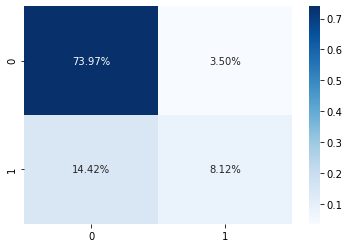

In [22]:
############ Random Forest ################

rf = RandomForestClassifier(n_estimators=500,min_samples_split=240,random_state=seed)
rf_results=rf.fit(data_train, label_train)

y_pred_rf = rf.predict(data_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(data_test, label_test)))
print(classification_report(label_test, y_pred_rf))
cf_matrix_rf = confusion_matrix(label_test, y_pred_rf)
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='Blues')

Results show that the accuracy of the Random forest classifier is about 82% on the test data. Thus, it improves on the performance of Logistic regression in this case. Again we look into the classification report and confusion matrix to have better understanding.
Here we can see the model also performs better on the default cases on the test data unlike logistic regression. The cause of concern in this could be in almost 14% of the cases model predicts no default but customers have defaulted. Again, lowering the threshold might improve the performance of our models in these cases. 

Next, we go to another famous algorithm Gradient Boosting. In earlier days of Kaggle, Random forest and Gradient Boosting have been very popular for data scientists. For Gradient Boosting we let the default parameters remain. But don't forget to set the random state to a pre-determined seed value.

Accuracy of Gradient Boosting classifier on test set: 0.82
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4648
           1       0.70      0.36      0.48      1352

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



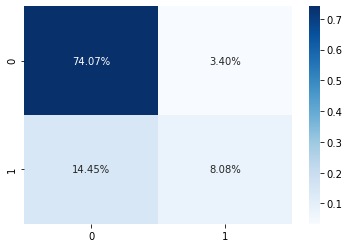

In [23]:
############ Gradient Boosting ################

gb = GradientBoostingClassifier(random_state=seed)
gb_results=gb.fit(data_train, label_train)

y_pred_gb = gb.predict(data_test)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(gb.score(data_test, label_test)))
print(classification_report(label_test, y_pred_gb))
cf_matrix_gb = confusion_matrix(label_test, y_pred_gb)
sns.heatmap(cf_matrix_gb/np.sum(cf_matrix_gb), annot=True, fmt='.2%', cmap='Blues')

In this case the Gradient Boosting also achieves 82% accuracy and fails to improve on the Random Forest. The classification report suggests the performance are almost identical to Random Forest. Only in the confusion matrix we see that the Gradient boosting slightly worse than Random forest in terms of False negatives (cases where the model predicts no default but actually customer defaults). In this particular context, the false negeatives are very important, as false negatives mean the credit card company losing money.

Finally to compare the three models we look to ROC curves for three cases and compute the AUC scores. AUC score simply means the Area under the curve. We have earlier talked about the threshold. While reducing the threshold may improve our model performance in terms of false positive case, but this also means flagging some cases as default where the customer may not default, which means false positive cases increase. Thus there is always this trade off.

TO understand the ROC curve, let's consider two terminal cases where we set this threshold as 0, this means we predict all cases as Default cases. This means our true positive rate would be 1, but at the same time false positve rate would also be 1. This corresponds to the right upper corner of the ROC curve. On the other end of the spectrum, if we consider a threshold of 1, then our false positive would be zero, but this means our true positive rate also drops to zero. This is the left lower corner of the ROC curve. The diagonal red dotted line joins this two cases and the ROC curve depicts the model performance across the spectrum. Thus AUC score is a more holistic measure of the model performance.

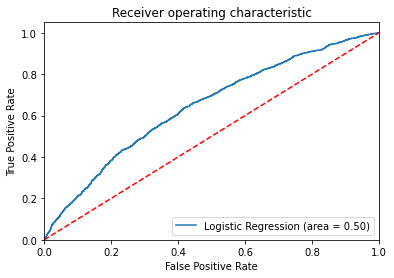

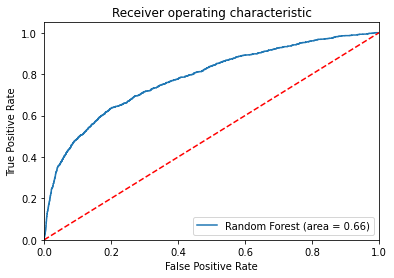

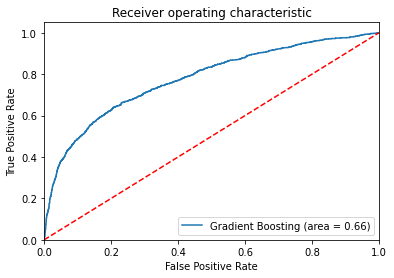

In [24]:
############ ROC Curve and AUC ################

def plot_roc(data_test,label_test,model,model_name):
    logit_roc_auc = roc_auc_score(label_test, model.predict(data_test))
    fpr, tpr, thresholds = roc_curve(label_test, model.predict_proba(data_test)[:,1])
    Label=model_name+' (area = %0.2f)'
    plt.figure()
    plt.plot(fpr, tpr, label=Label % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(data_test,label_test,log_reg,'Logistic Regression')
plot_roc(data_test,label_test,rf,'Random Forest')
plot_roc(data_test,label_test,gb,'Gradient Boosting')

As we can notice from the results, Random Forest and Gradient Boosting achieve almost equal performance on the test dataset and they show considerable improvement on the Logistic Regression.

These analysis shows how with very simple setup machine learning algorithms give superior performance. These performances can be further improved probably with cross-validation and hyper-parameter tuning. This is an important application, where machine learning algorithms are implemented to make real-life business decisions. Thus goes to show how omnipresent AI and machine learning is in our daily lives.